**Math 345M Homework 6**

**Cole Pendergraft**

**Read pages 567-600 and do Chapter 10: 73-77, 80, 82, 91**

*Use the following information to answer the next five exercises.* A doctor wants to know if a blood pressure medication is
effective. Six subjects have their blood pressures recorded. After twelve weeks on the medication, the same six subjects
have their blood pressure recorded again. For this test, only systolic pressure is of concern. Test at the 1% significance level.

| Patient | A | B | C | D | E | F | 
|:--------|---|---|---|---|---|---|
|**Before**|161|162|165|162|166|171|
|**After**|158|159|166|160|167|169|

In [2]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt

**Problem 10.73:** State the null and alternative hypotheses.

Here we are provided two random samples from a larger population, but no information regarding the populations. Given that our sample sizes are small and the two samples are drawn from the same pair of individuals, I would propose that we have a matched pair situation here, and should do our hypothesis testing with reference to the difference between our population means.

Lets say that $\mu_{d} = \mu_{after} - \mu_{before}$

Our null hypothesis is a statement of no difference, so if our $\mu_d = 0$, that means we have no difference in patient BP after using the medication.

$H_0: \mu_d = 0$

Our alternative hypothesis will match that of the expected outcome from using the blood pressure medication:

$H_a: \mu_d < 0$

=========================================================================================================================

**Problem 10.74:** What is the test statistic?

We established before that we have a matched pair situation here, so we can calculate the test statistic (t-score) using the following formula:

$\huge{t = {{\bar x_d - \mu_d} \over {s_d \over \sqrt{n}}}}$

Where $\bar x_d$ is mean of the sample differences, $s_d$ is the sample standard deviation of the differences, $n$ is the sample size, and $\mu_d$ is the hypothesized difference between the populations (provided by the null hypothesis). In this case, our null hypothesis assumes that there is no difference bewteen the 'before' and 'after' elements, so $\mu_d = 0$.

While I'm sure that scipy.stats.t contains a method for finding this test-statistic with one line of code, I found it easier  to write my own function to perform the calculation rather than try to determine what scipy.stats.t method returned the same t score.

In [2]:
def find_diff_list(list1, list2):
    """
    Creates a list of differences populated with list2[i] - list1[i] elements
    list1 is typically the sample of 'before' objects
    list2 is typically the sample of 'after' objects
    """
    diff_list = []
    for i in range(len(list1)):
        diff_list.append(list2[i] - list1[i])
    
    return diff_list

def find_MP_Tscore(list1, list2, mu_d):
    """
    Finds the t score for a matched pair situation (and only a matched pair situation)
    list1 will typically be the list of 'before' objects
    list2 will typically be the list of 'after' objects
    mu_d is the hypothesized mean difference between the populations, provided by the null hypothesis
    """
    diff_list = find_diff_list(list1, list2) # Create the list of differences between 'before' and 'after'
    
    diff_n = len(diff_list) # Variable that stores the size of the diff list
    
    diff_mean = np.mean(diff_list) # Find the mean of the diff list
    
    diff_std = np.std(diff_list, ddof = 1) # Find the std of the diff list. np.std doesn't work correctly without the ddof = 1,
                                            # as without that it will divide the individual variances by n rather than n-1.
    
    t_score = (diff_mean - mu_d)/(diff_std/(diff_n**(1/2))) # Calculate t-score
    
    return t_score    

In [3]:
before_list = [161, 162, 165, 162, 166, 171]
after_list = [158, 159, 166, 160, 167, 169]

t_score = find_MP_Tscore(before_list, after_list, 0)

print("Our test statistic is", t_score)

Our test statistic is -1.7541160386140584


=========================================================================================================================

**Problem 10.75:** What is the $p$-value?

We can calculate the $p$-value for a t distribution using the sp.t.sf(abs(test_stat), DF) method. Our first argument will be the absolute value of the test statistic, which we calculated in the previous part. DF represents the degrees of freedom, and when we are working with a matched pair situation, our degrees of freedom are df = n - 1.

In [4]:
p = sp.t.sf(abs(t_score), 5)
print("Our p-value is", p)

Our p-value is 0.0698895155525873


=========================================================================================================================

**Problem 10.76:** What is the sample mean difference?

We found and used the sample mean difference in problem number 74. We calculated it as:

In [5]:
before_list = [161, 162, 165, 162, 166, 171]
after_list = [158, 159, 166, 160, 167, 169]

diff_list = find_diff_list(before_list, after_list)
samp_mean_diff = np.mean(diff_list)

print("Our sample mean difference is", samp_mean_diff)

Our sample mean difference is -1.3333333333333333


=========================================================================================================================

**Problem 10.77:** What is the conclusion?

We have our p value and know that alpha = 0.01, so we have enough to check if we should reject our null hypothesis.

In [6]:
def rejectCheck(alpha, p):
    # Checks if a null hypothesis should be rejected. A return of 'True' indicates H_0 should be rejected.
    # A return of 'False' indicates H_0 should not be rejected.
    return alpha > p

In [7]:
rejectCheck(0.01, p)

False

So our reject test returned false, which tells us that we should not reject our null hypothesis. From this, we can interpret that at a 1% level of significance there is not enough evidence to support the claim that this particular medication successfully reduces blood pressure.

=========================================================================================================================

**Problem 10.80:** At Rachel’s 11th birthday party, eight girls were timed to see how long (in seconds) they could hold their breath in a relaxed position. After a two-minute rest, they timed themselves while jumping. The girls thought that the mean difference between their jumping and relaxed times would be zero. Test their hypothesis. We shold use the solution sheet from Appendix E here.

| Relaxed Time (s) | Jumping Time (s) |
|:-----------------|:-----------------|
| 26 | 21 |
| 47 | 40 |
| 30 | 28 |
| 22 | 21 |
| 23 | 25 |
| 45 | 43 |
| 37 | 35 |
| 29 | 32 |

The key words in this problem are "mean difference", which tell us that we are once again working with a matched pair situation and should look at differences.

Our two populations are $\mu_{rel}$ and $\mu_{jump}$, and since the relaxed times are taken **before** the jumping times, I would propose that our 'before' list is the relaxed times, and our 'after' list is the jumping times. Thus, we have that $\mu_d = \mu_{jump} - \mu_{rel}$.

**a)** Give $H_0$

The girls hypothesize that the difference between their jumping and relaxed times would be zero. This is a hypothesis of no difference, so the null hypothesis is

$H_0: \mu_d = 0$

**b)** Give $H_a$

Our alternative hypothesis is directly opposite our null hypothesis. Thus, we have

$H_a: \mu_d \ne 0$

**c)** Clearly state the random variable

As previously mentioned, we are once again looking at matched pairs here, which implies that we should be looking at the differences between the sample means. Thus, we have that $\bar X_d$ is the mean of the difference between the relaxed and jumping breath hold times.

**d)** State the distribution to use for the test.

Since this is a matched pair situation, we should use a t-distribution. Matched pairs have n-1 degrees of freedom, so our distribution is a t-distribution with 7 degrees of freedom.

**e)** What is the test statistic?

In the previous problems I wrote functions that can be used to find the test statistic of a matched pair situation. Our null hypothesis assumes that we have exactly no difference between the individual means of the two lists, so we have that $\mu_d = 0$.

In [8]:
relaxed = [26, 47, 30, 22, 23, 45, 37, 29]
jump = [21, 40, 28, 21, 25, 43, 35, 32]

t_score = find_MP_Tscore(relaxed, jump, 0)
print("Our t-score test statistic is", t_score)

Our t-score test statistic is -1.5071573172061195


**f)** What is the $p$-value? In one or two complete sentences, explain what the p-value means for this problem.

In this situation we are have two cases that would make our null hypothesis invalid, if $\mu_d \ge 1$ or if $\mu_d \le 1$, so we are performing a two tailed hypothesis test. All this means is that we are going to need to multiply the value returned by our sp.t.sf() method by two to account for the two possible outcomes.

In [9]:
p = sp.t.sf(abs(t_score), 7)*2

print("Our p-value is", p)

Our p-value is 0.1754994493585011


From this p-value we are able to determine that if our null hypothesis is true, there is about a 17.5% chance that we will be able to replicate the same (or more extreme) results with a different random sample. So if our null hypothesis does turn out to be true, there is about an 82.5% chance that the result is an outlier, given the 17.5% chance that our results can be replicated.

**g)** Use the previous information to sketch a picture of this situation. Label and scale the horizontal axis and shade the region(s) corresponding to the $p$-value.

When working with t distributions and two tailed tests, p/2 encompasses the area to the left of the negative mean and to the right of the positive mean. First things first, then, we need to find the mean of our differences list. 

In [10]:
diff_list = find_diff_list(relaxed, jump)

mean = np.mean(diff_list)
print(mean)

-1.75


So our mean is -1.75. This means that p/2 encompasses the area from [-inf, -1.75] and [1.75, inf].

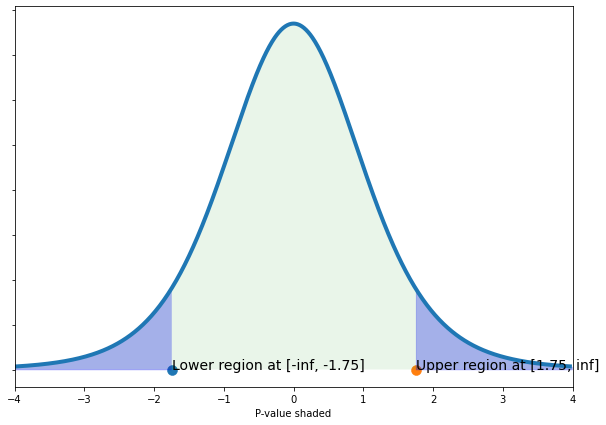

In [11]:
diff_list = find_diff_list(relaxed, jump)
n = len(diff_list)
df = n - 1

x = np.arange(-8, mean, 0.01)
x_all = np.arange(-8, 4, 0.01)
x_other = np.arange(abs(mean), 4, 0.01)

y = sp.t.pdf(x, df)
y2 = sp.t.pdf(x_all, df)
y3 = sp.t.pdf(x_other, df)

fig, ax = plt.subplots(figsize = (10, 7))
plt.style.use('fivethirtyeight')
ax.plot(x_all, y2)

plt.scatter(-1.75, 0, s=100)
plt.annotate("Lower region at [-inf, -1.75]", (mean, 0))
plt.scatter(1.75, 0, s=100)
plt.annotate("Upper region at [1.75, inf]", (abs(mean), 0))
ax.fill_between(x_other, y3, 0, alpha = 0.3, color = 'b')
ax.fill_between(x, y, 0,  alpha = 0.3, color = 'b')
ax.fill_between(x_all, y2, 0, alpha = 0.1)
ax.set_xlim([-4, 4])
ax.set_xlabel('P-value shaded')
ax.set_yticklabels([])
plt.show()

**h)** Indidcate the correct decision ("reject" or "do not reject" the nuyll hypothesis), the reason for it, and write an appropriate conclusion using complete sentences.

h.1) Motivate a value for alpha.

Since there aren't particularly high stakes associated with this test, I will be using the standard value for alpha at 0.05.

In [12]:
alpha = 0.05

h.2) What is your decision?

In [13]:
rejectCheck(alpha, p)

False

Given the results of the rejectCheck, we should not reject $H_0$.

h.3) Why is that your decision?

We have that our $p-value > \alpha$, which implies we should not reject $H_0$.

h.4) Give a conclusion.

We can conclude that at a significance level of 5%, we do not have enough information to reject the claim that the difference between breath holding times for a relaxed position and jumping is 0. This doesn't mean that we can say that the difference *is* 0, just that we cannot say that the difference *is not* 0.

**i)** In complete sentences, explain how you determined which distribution to use.

We are working with a matched pair situation here in which we have no knowledge about the population means, population standard deviations, or the sample standard deviations. Using a t-distribution was our only option.

=========================================================================================================================

**Problem 10.82:** Marketing companies have collected data implying that teenage girls use more ring tones on their cellular phones than teenage boys do. In one particular study of 40 randomly chosen teenage girls and boys (20 of each) with cellular phones, the mean number of ring tones for the girls was 3.2 with a standard deviation of 1.5. The mean for the boys was 1.7 with a standard deviation of 0.8. Conduct a hypothesis test to determine if the means are approximately the same or if the girls’ mean is higher than the boys’ mean.

In this situation we have been provided with the following statistics:

We have a sample of 20 boys, so $n_{boys} = 20$

The mean number of ringtones for boys is 1.7, so $\bar x_{boys} = 1.7$

The standard deviation for the number of ringtones for boys is 0.8, so $s_{boys} = 0.8$

We also have a sample of 20 girls, so $n_{girls} = 20$

The mean number of ringtones for girls is 3.2, so $\bar x_{girls} = 3.2$

The standard deviation for the number of ringtones for girls is 1.5, so $s_{girls} = 1.5$

From these provided statistics we can conclude that we have a "two population means with unknown standard deviations" situation here.

In [3]:
n_boys = 20
n_girls = 20

mean_boys = 1.7
mean_girls = 3.2

std_boys = 0.8
std_girls = 1.5

**a)** Give $H_0$

We have population means $\mu_{boys}$ and $\mu_{girls}$.

We are provided in the question that the two hypotheses we are looking at are 1) That the means are approximately the same and 2) That the girls mean is higher than the boys mean. Since the null hypothesis is usually a claim of no difference, $H_0$ is likely to be the first provided hypothesis.

$H_0: \mu_{girls} = \mu_{boys}$

**b)** Give $H_a$

Our alternative hypothesis matches the expected outcome, that girls have more ringtones than boys.

$H_a: \mu_{girls} > \mu_{boys}$

**c)** In words, clearly state what your random variable $\bar X_1 - \bar X_2$ represents.

In this situation, our random variable $\bar X_1 - \bar X_2$ represents the mean difference between the amount of ringtones that girls and boys have.

**d)** State the distribution to be used

We are going to be using a t distribution for this test. Since we have a "two population means with unknown standard deviations" situation, we can't calculate the degrees of freedom as just n-1. Rather, we have to use the formula for the degrees of freedom, which is:

$\huge{df = {({{(s_1)^2 \over n_1} + {(s_2)^2 \over n_2}})^2 \over {({1 \over {n_1 - 1}})({(s_1)^2 \over n_1})^2 + ({1 \over {n_2 - 1}})({(s_2)^2 \over n_2})^2}}}$

Where $s_1$ and $s_2$ are the standard deviations of our samples and $n_1$ and $n_2$ are our sample sizes.

This is another situation where I'm sure that scipy.stats.t has some method to perform this calculation in one line, but I find it easier to write my own function based on the provided formula.

In [4]:
def find_deg_freedom(s1, s2, n1, n2):
    """
    Finds the degrees of freedom for two lists
    s1 is the standard deviation of list1
    s2 is the standard deviation of list2
    n1 is the length of list1
    n2 is the length of list2
    """
    # Breaking the equation into bits so I don't have to write a single nasty arithmetic operation
    bit1 = (s1**2)/n1
    bit2 = (s2**2)/n2
    
    bit3 = 1/(n1-1)
    bit4 = bit1**2
    
    bit5 = 1/(n2-1)
    bit6 = bit2**2
    
    df = ((bit1 + bit2)**2)/((bit3)*(bit4) + (bit5)*(bit6))
    
    return df

In [5]:
df = find_deg_freedom(std_girls, std_boys, n_girls, n_boys)
print(df)

28.999817254801634


So we will be using a t-distribution with about 29 degrees of freedom.

**e)** What is the test statistic?

Since we have a "two population means with no standard deviations" situation here, we have a different t-score computation than we had when we were working with the matched pairs. The t-score computation is given as follows:

$\huge{t = {{(\bar x_1 - \bar x_2) - (\mu_1 - \mu_2)} \over {\sqrt{({(s_1)^2 \over n_1}) + ({(s_2)^2 \over n_2})}}}}$

Where $\bar x_1$ and $\bar x_2$ are the sample means, $\mu_1 - \mu_2$ is the *expected* difference between the population means based on the null hypothesis (in this case we are assuming no difference, so this is 0), $n_1$ and $n_2$ are the sample sizes, and $s_1$ and $s_2$ are the sample standard deviations.

I have written another function to automate this process for me.

In [6]:
def find_2Samp_test_stat(xbar1, xbar2, s1, s2, n1, n2, mu1, mu2):
    """
    Finds the test statistic of a two sample t test
    xbar1 is the mean of the first sample
    xbar2 is the mean of the second sample
    s1 is the standard dev of the first sample
    s2 is the standard dev of the second sample
    n1 is the size of the first sample
    n2 is the size of the second sample
    mu1 is the population mean associated with the first sample
    mu2 is the population mean associated with the second sample
    """
    # Once again breaking the equation into bits to ensure that I don't make a mistake
    bit1 = (s1**2)/n1
    bit2 = (s2**2)/n2
    
    numer = (xbar1 - xbar2) - (mu1 - mu2)
    denom = (bit1 + bit2)**(1/2)
    
    t_score = numer/denom
    return t_score

In [7]:
t = find_2Samp_test_stat(mean_girls, mean_boys, std_girls, std_boys, n_girls, n_boys, 0, 0)
print("Our t-score is", t)

Our t-score is 3.946002313234924


**f)** What is the $p$-value? Explain what the $p$-value means for this problem.

We just have a single tailed test here, so we can use scipy.stats.t.sf() like we normally would.

In [9]:
p = sp.t.sf(abs(t), df)
print("Our p-value is", p)

Our p-value is 0.00023157849246765075


**g)** Sketch a graph of this situation.

When working with t distributions and two tailed tests, p/2 encompasses the area to the left of the negative mean and to the right of the positive mean.

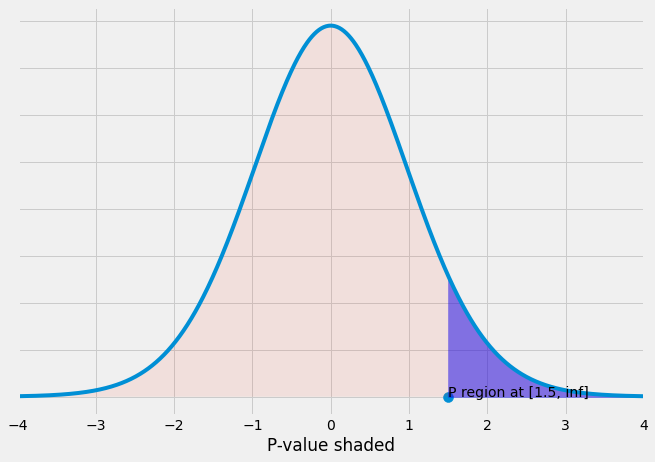

In [12]:
mean = mean_girls - mean_boys

x = np.arange(mean, 8, 0.01)
x_all = np.arange(-8, 4, 0.01)


y = sp.t.pdf(x, df)
y2 = sp.t.pdf(x_all, df)

fig, ax = plt.subplots(figsize = (10, 7))
plt.style.use('fivethirtyeight')
ax.plot(x_all, y2)

ax.fill_between(x, y, 0,  alpha = 0.3, color = 'b')
ax.fill_between(x_all, y2, 0, alpha = 0.1)
ax.set_xlim([-4, 4])
ax.set_xlabel('P-value shaded')
ax.set_yticklabels([])
plt.show()

**h)** Indicate the correct decision, the reason for it, and write an appropriate conclusion.

h.1) Since we do not have a particularly high stakes situation here, we will be using the standard value for alpha $\alpha = 0.05$.

In [21]:
alpha = 0.05

In [22]:
rejectCheck(alpha, p)

True

h.2) Given the results of our rejection check, we find that we should reject the null hypothesis.

h.3) We reject our null hypothesis because we have that our p-value < alpha.

h.4) From this, we can conclude that it would be highly unlikely that both boys and girls have the same number of ringtones on their phones. This would lead us to believe that our alternative hypothesis is likely true. I still struggle to see how rejecting our null hypothesis of $\mu_{girls} = \mu_{boys}$ implies that $\mu_{girls} > \mu_{boys}$ and not $\mu_{girls} \ne \mu_{boys}$, but the question is very explicit about the fact that the hypotheses that we are considering are that 1) the mean for boys and girls are approximately equal and 2) that girls have more ringtones than boys, though I definitely think there is a chance that I am interpreting the question wrong.

**i)** Explain how you determined which distribution to use.

In this problem, we are provided two samples of two larger populations without also being provided the standard deviations of those two larger populations, so the only option available to us is to use a t-distribution.

=========================================================================================================================

**Problem 10.91:** A powder diet is tested on 49 people, and a liquid diet is tested on 36 different people. Of interest is whether the liquid diet yields a higher mean weight loss than the powder diet. The powder diet group had a mean weight loss of 42 pounds with a standard deviation of 12 pounds. The liquid diet group had a mean weight loss of 45 pounds with a standard deviation of 14 pounds.

We are provided with the following statistics from this question:

The liquid diet is tested on a sample of 36 people, so $n_{liq} = 36$

The liquid diet group has a mean weight loss of 45 pounds, so $\bar x_{liq} = 45$

The liquid diet group has a standard deviation of 14 pounds, so $s_{liq} = 14$

The powder diet is tested on a sample of 49 people, so $n_{pow} = 49$

The powder diet group has a mean weight loss of 42 pounds, so $\bar x_{pow} = 42$

The powder diet group has a standard deviation of 12 pounds, so $s_{pow} = 12$

So here we are once again provided with our two samples and there corresponding statistics, but nothing about the larger populations. This leads me to believe that we once again have a "two population means with unknown standard deviations" situation here. 

In [23]:
n_liquid = 36
n_powder = 49

mean_liquid = 45
mean_powder = 42

std_liquid = 14
std_powder = 12

**a)** Give $H_0$

We have two population means: $\mu_{pow}$ and $\mu_{liq}$.

Our area of particular interest is whether $\mu_{pow} < \mu_{liq}$, which suggests that our null hypothesis is 

$H_0: \mu_{pow} \ge \mu_{liq}$

**b)** Give $H_a$

From $H_0$ above, we can conclude that $H_a$ is

$H_a: \mu_{pow} < \mu_{liq}$

**c)**  In words, clearly state what your random variable $\bar X_{pow} - \bar X_{liq}$ represents.

$\bar X_{liq} - \bar X_{pow}$ represents the difference in weight loss between the liquid diet group and the powder diet group.

**d)** State the distribution for the test.

Once again we have a "two population means with unknown standard deviations" situation, which means we will be using a t-distribution. All we need now is the degrees of freedom of this distribution.

In [24]:
df = find_deg_freedom(std_powder, std_liquid, n_powder, n_liquid)
print(df)

68.44150192838677


So we will be using a t-distribution with 68 degrees of freedom.

**e)** What is the test statistic?

Since we have a "two population means with no standard deviations" situation here, we can once again use the function I wrote in the previous part. We are once again assuming no difference between the two population means, so $\mu_1 - \mu_2$ = 0.

In [25]:
t = find_2Samp_test_stat(mean_powder, mean_liquid, std_powder, std_liquid, n_powder, n_liquid, 0, 0)
print("Our t-score is", t)

Our t-score is -1.0361337594312106


**f)** What is the $p$-value? In one or two sentences explain what the $p$-value means for this problem.

This is just a single tailed t-test, so we can just use sp.t.sf() as we normally would.

In [26]:
p = sp.t.sf(abs(t), df)
print("Our p-value is", p)

Our p-value is 0.15189340486005612


From this p-value we are able to determine that if our null hypothesis is true, there is about a 15.2% chance that we will be able to replicate the same (or more extreme) results with a different random sample. So if our null hypothesis does turn out to be true, there is about an 84.8% chance that the result is an outlier, given the 15.2% chance that our results can be replicated.

**g)** Sketch a picture of the situation

When working with two sample t distributions and single tailed tests, and particularly a situation where we have a < for our alt hypothesis, p encompasses the area to the left of $\bar x_1 - \bar x_2$

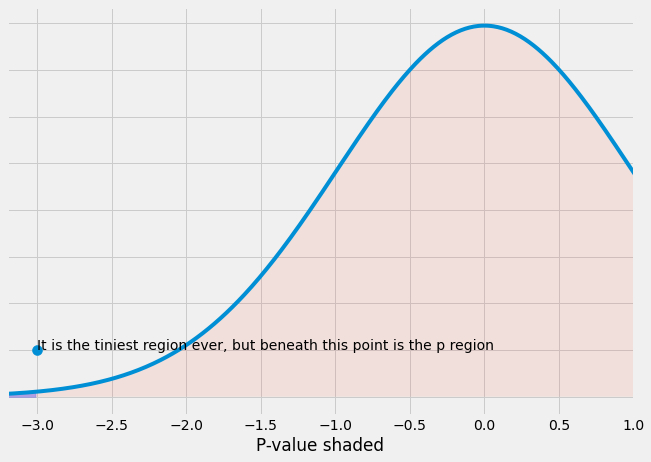

In [27]:
mean = mean_powder - mean_liquid

x = np.arange(-5, mean, 0.01)
x_all = np.arange(-5, 5, 0.01)

y = sp.t.pdf(x, df)
y2 = sp.t.pdf(x_all, df)

fig, ax = plt.subplots(figsize = (10, 7))
plt.style.use('fivethirtyeight')
ax.plot(x_all, y2)

plt.scatter(-3, 0.05, s=100)
plt.annotate("It is the tiniest region ever, but beneath this point is the p region", (mean, 0.05))
ax.fill_between(x, y, 0, alpha = 0.3, color = 'b')
ax.fill_between(x_all, y2, 0, alpha = 0.1)
ax.set_xlim([-3.2, 1])
ax.set_xlabel('P-value shaded')
ax.set_yticklabels([])
plt.show()

**h)** Indicate the correct decision, the reason for it, and write an appropriate conclusion using complete sentences.

h.1) Since we once again do not have a particularly high stakes situation, I will be using the standard value for alpha, $\alpha = 0.05$

In [28]:
alpha = 0.05

In [29]:
rejectCheck(alpha, p)

False

h.2) Given the result from our rejection check, we find that we cannot reject our null hypothesis.

h.3) We choose not to reject our null hypothesis because our $p$-value is greater than our alpha.

h.4) From this outcome, we can determine that there is not enough information to reject the claim that the powder diet is as effective or more effective than the liquid diet. This further means that we don't have enough evidence to support the claim that the liquid diet is more effective than the powder diet. 

**i)** How did you choose your distribution?

In this problem, we are provided two samples of two larger populations without also being provided the standard deviations of those two larger populations, so the only option available to us is to use a t-distribution.